<font size=5>Machine Learning Model Diagnostics and Validation</font>

Updated on July 22, 2022

This demo (based on TaiwanCredit data, a classification task) covers: 

- Accuracy, WeakSpot and Overfit

- Reliability Testing

- Robustness and Resilience Testing

- Model Comparison and Benchmarking


# Install PiML Toolbox

- Run `!pip install piml` to install the latest version of PiML.
- In Google Colab, we need restart the runtime in order to use newly installed version.

In [ ]:
!pip install piml

# Load and Prepare Data

- Initilaize a new experiment by `piml.Experiment()`
- Low-code interactive interface, or
- High-code autorun scripts (optional)  

In [ ]:
from piml import Experiment
exp = Experiment()

## Low-code Interface

In [2]:
# Choose TaiwanCredit
exp.data_loader()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [3]:
# Use only payment history attributes: Pay_1~6, BILL_AMT1~6 and PAY_AMT1~6 (i.e., exclude all others)
# Keep the response `FlagDefault`
exp.data_summary()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.…

In [4]:
exp.data_prepare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [5]:
exp.eda()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

## High-code Scripts (optional)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0        20000.0  2.0        2.0       1.0  24.0    2.0    2.0   -1.0   -1.0   
1       120000.0  2.0        2.0       2.0  26.0   -1.0    2.0    0.0    0.0   
2        90000.0  2.0        2.0       2.0  34.0    0.0    0.0    0.0    0.0   
3        50000.0  2.0        2.0       1.0  37.0    0.0    0.0    0.0    0.0   
4        50000.0  1.0        2.0       1.0  57.0   -1.0    0.0   -1.0    0.0   
...          ...  ...        ...       ...   ...    ...    ...    ...    ...   
29995   220000.0  1.0        3.0       1.0  39.0    0.0    0.0    0.0    0.0   
29996   150000.0  1.0        3.0       2.0  43.0   -1.0   -1.0   -1.0   -1.0   
29997    30000.0  1.0        2.0       2.0  37.0    4.0    3.0    2.0   -1.0   
29998    80000.0  1.0        3.0       1.0  41.0    1.0   -1.0    0.0    0.0   
29999    50000.0  1.0        2.0       1.0  46.0    0.0    0.0    0.0    0.0   

       PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0        0.0    0.0   3.592621   3.491782   2.838849   0.000000   0.000000   
1        0.0    2.0   3.428621   3.237041   3.428621   3.514946   3.538574   
2        0.0    0.0   4.465977   4.146996   4.132260   4.156307   4.174612   
3        0.0    0.0   4.672015   4.683353   4.692776   4.452016   4.461799   
4        0.0    0.0   3.935406   3.753660   4.554319   4.320997   4.282101   
...      ...    ...        ...        ...        ...        ...        ...   
29995    0.0    0.0   5.276345   5.285143   5.318827   4.944507   4.494683   
29996    0.0    0.0   3.226342   3.262214   3.544440   3.953276   3.715251   
29997    0.0    0.0   3.552181   3.525951   3.440752   4.319710   4.313509   
29998    0.0   -1.0  -3.216430   4.894205   4.882553   4.722428   4.073938   
29999    0.0    0.0   4.680607   4.689362   4.696924   4.562721   4.510933   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0       0.000000  0.000000  2.838849  0.000000  0.000000  0.000000  0.000000   
1       3.513484  0.000000  3.000434  3.000434  3.000434  0.000000  3.301247   
2       4.191731  3.181558  3.176381  3.000434  3.000434  3.000434  3.699057   
3       4.470528  3.301247  3.305351  3.079543  3.041787  3.029384  3.000434   
4       4.281760  3.301247  4.564453  4.000043  3.954291  2.838849  2.832509   
...          ...       ...       ...       ...       ...       ...       ...   
29995   4.203604  3.929470  4.301052  3.699317  3.484015  3.699057  3.000434   
29996   0.000000  3.264345  3.547405  3.954194  2.113943  0.000000  0.000000   
29997   4.286861  0.000000  0.000000  4.342442  3.623353  3.301247  3.491502   
29998   4.689708  4.933998  3.532754  3.071514  3.284882  4.723989  3.256477   
29999   4.185089  3.317854  3.255514  3.155640  3.000434  3.000434  3.000434   

       FlagDefault  
0              1.0  
1              1.0  
2              0.0  
3              0.0  
4              0.0  
...            ...  
29995          0.0  
29996          0.0  
29997          1.0  
29998          1.0  
29999          1.0  

[30000 rows x 24 columns]

HTML(value='Data Shape:(30000, 24)')

0                                           1
0  Excluded columns  [SEX, AGE, LIMIT_BAL, EDUCATION, MARRIAGE]
1   Target variable                                 FlagDefault
2     Sample weight                                        None
3         Task type                              Classification
4      Split method                                      Random
5        Test ratio                                         0.2
6      Random state                                           0

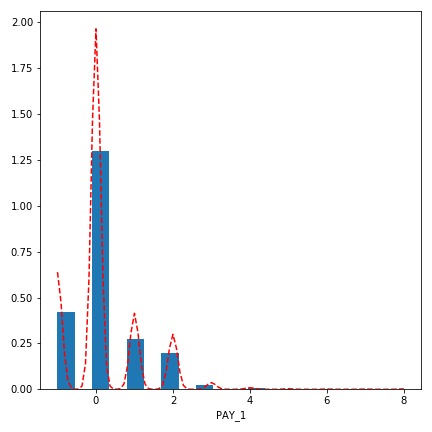

In [6]:
exp.data_loader(data='TaiwanCredit')

exp.data_summary(feature_type={}, feature_exclude=["SEX", "EDUCATION", "MARRIAGE", "AGE", "LIMIT_BAL"])

exp.data_prepare(target='FlagDefault', task_type='classification', test_ratio=0.2, random_state=0)

exp.eda(show='univariate', uni_feature='PAY_1')

# Train Black-Box Models

e.g. XGBoost (depth 5 with 500 trees)

In [7]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=500, max_depth=5)
exp.model_train(model, name="XGBoost5")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value="<p class='notification info'>Register XGBoost5 Done</p>")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

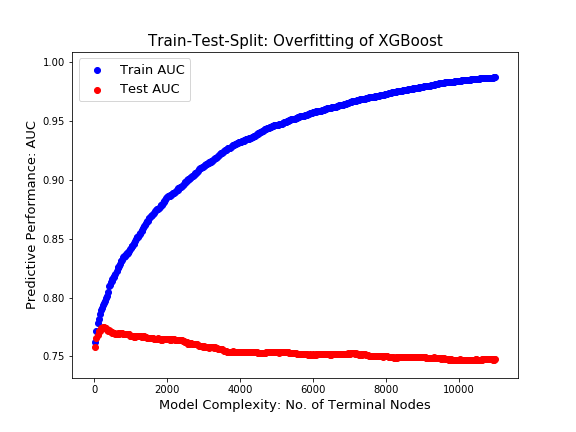

In [9]:
# XGBoost Overftting under train-test-split framework

import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from sklearn.metrics import mean_squared_error, roc_auc_score

train_x, train_y, train_sample_weight = exp.get_model("XGBoost5").get_data(train=True)
test_x, test_y, test_sample_weight = exp.get_model("XGBoost5").get_data(test=True)

def score(clf, iteration_range):
    train_auc = roc_auc_score(train_y, clf.predict_proba(train_x, iteration_range=iteration_range)[:,1])
    test_auc = roc_auc_score(test_y, clf.predict_proba(test_x, iteration_range=iteration_range)[:, 1])
    tree_idx = np.logical_and(xgbinfo["Tree"] < iteration_range[1], xgbinfo["Tree"] >= iteration_range[0])
    n_leaves = np.sum(xgbinfo[tree_idx].loc[:, ["Feature"]].values == "Leaf")
    return {'n_leaves': n_leaves, 'train_auc': train_auc, 'test_auc': test_auc}

all_metrics = []
xgbinfo = clf.get_booster().trees_to_dataframe()
n_iter = 500
for i in range(n_iter):
    metrics = score(clf, (0, i + 1))
    all_metrics.append(metrics)
all_resluts = pd.DataFrame(all_metrics)

plt.figure(figsize=(8,6))
plt.scatter(all_resluts["n_leaves"], all_resluts["train_auc"], color="blue", label="Train AUC")
plt.scatter(all_resluts["n_leaves"], all_resluts["test_auc"], color="red", label="Test AUC")
plt.legend(fontsize=13)
# plt.yscale("log")
plt.ylabel("Predictive Performance: AUC", fontsize=13)
plt.xlabel("Model Complexity: No. of Terminal Nodes", fontsize=13)
plt.title("Train-Test-Split: Overfitting of XGBoost", fontsize=15)
plt.show()

In [10]:
# Choose XGBoost5, check Overfit
exp.model_diagnose()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Train Intepretable models: ReLU-DNNs

ReLU-DNN modeling with L1 Regularization Strength = 0.00001 vs. 0.0008

In [11]:
# ----------------------------------
# Low-code Interface
# ----------------------------------

# Choose ReLU-DNN (default), Run; then customize Sparse-ReLU-DNN with L1-regularization = 0.0008
exp.model_train()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [12]:
# ----------------------------------
# High-code Scripts (optional)
# ----------------------------------

# ReLU-DNN: ReLU Deep Neural Networks (default parameters)
from piml.models import ReluDNNClassifier

clf = ReluDNNClassifier(hidden_layer_sizes=(40, 40), l1_reg=1e-05,
                        batch_size=500, learning_rate=0.001)
exp.model_train(model=clf, name='ReLU-DNN')
exp.model_diagnose(model="ReLU-DNN", show='accuracy_table')

# Sparse-ReLU-DNN: set L1-Regularization to be 0.0008
clf = ReluDNNClassifier(hidden_layer_sizes=(40, 40), l1_reg=0.0008,
                        batch_size=500, learning_rate=0.001)
exp.model_train(model=clf, name='Sparse-ReLU-DNN')
exp.model_diagnose(model="Sparse-ReLU-DNN", show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value="<p class='notification warn'>The model name `ReLU-DNN`is already registered</p>")

ACC      AUC   Recall Precision       F1
                                                  
Train  0.8208   0.7755   0.3705    0.6781   0.4792
Test   0.8277   0.7694   0.3655    0.6920   0.4783
Gap    0.0068  -0.0061  -0.0050    0.0139  -0.0009

HTML(value="<p class='notification info'>Register Sparse-ReLU-DNN Done</p>")

ACC     AUC  Recall Precision      F1
                                               
Train  0.8188  0.7628  0.3652    0.6701  0.4728
Test   0.8282  0.7664  0.3716    0.6905  0.4832
Gap    0.0094  0.0036  0.0064    0.0204  0.0104

# Interpret/Explain

In [13]:
# Choose ReLU-DNN
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [14]:
# Choose Sparse-ReLU-DNN
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [15]:
# Choose ReLU-DNN or Sparse-ReLU-DNN, as well as arbitrary black-box models upon registration
exp.model_explain()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Diagnose/Compare

In [16]:
exp.model_diagnose()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [17]:
# Compare ReLU-DNN, Sparse-ReLU-DNN and XGBoost5
exp.model_compare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>